In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline

In [2]:
player_data = pd.read_csv("Data/atp_players.csv")

match_data = {}
whole_match_data = pd.DataFrame()

for year in range(2000, 2022):
    data = pd.read_csv(f"Data/{year}.csv")
    match_data[str(year)] = data.copy()
    whole_match_data = pd.concat([whole_match_data, data])

## Data description

### Player data

In [3]:
player_data.shape

(10912, 22)

In [4]:
player_data.head(3)

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,birth_date
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN,1958-01-13
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN,1960-02-02
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN,1963-04-25


In [5]:
player_data.dtypes

player_id         object
first_name        object
first_initial     object
last_name         object
full_name         object
player_url        object
flag_code         object
residence         object
birthplace        object
birthdate         object
birth_year       float64
birth_month      float64
birth_day        float64
turned_pro       float64
weight_lbs       float64
weight_kg        float64
height_ft         object
height_inches    float64
height_cm        float64
handedness        object
backhand          object
birth_date        object
dtype: object

### Match data

In [6]:
whole_match_data.shape

(58664, 54)

In [7]:
whole_match_data.tail(5)

,atp,location,tournament,date,series,court,surface,round,best_of,winner,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
2484,61,Turin,Masters Cup,2021-11-19,Masters Cup,Indoor,Hard,Round Robin,3,Ruud C.,...,NaN,NaN,NaN,NaN,NaN,NaN,2.65,1.63,2.49,1.53
2485,61,Turin,Masters Cup,2021-11-19,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.16,7.71,1.12,6.27
2486,61,Turin,Masters Cup,2021-11-20,Masters Cup,Indoor,Hard,Semifinals,3,Medvedev D.,...,NaN,NaN,NaN,NaN,NaN,NaN,1.18,7.40,1.13,5.83
2487,61,Turin,Masters Cup,2021-11-20,Masters Cup,Indoor,Hard,Semifinals,3,Zverev A.,...,NaN,NaN,NaN,NaN,NaN,NaN,3.32,1.45,2.99,1.39
2488,61,Turin,Masters Cup,2021-11-21,Masters Cup,Indoor,Hard,The Final,3,Zverev A.,...,NaN,NaN,NaN,NaN,NaN,NaN,2.65,1.63,2.44,1.56


In [8]:
whole_match_data.dtypes

atp             int64
location       object
tournament     object
date           object
series         object
court          object
surface        object
round          object
best_of         int64
winner         object
loser          object
wrank         float64
lrank          object
w1            float64
l1            float64
w2             object
l2             object
w3             object
l3             object
w4            float64
l4            float64
w5            float64
l5            float64
wsets         float64
lsets         float64
comment        object
cbw           float64
cbl           float64
gbw           float64
gbl           float64
iww           float64
iwl           float64
sbw           float64
sbl           float64
b365w         float64
b365l         float64
b_ww          float64
b_wl          float64
exw            object
exl           float64
psw           float64
psl           float64
wpts          float64
lpts          float64
ubw           float64
ubl       

### Description of columns for player data
```text
    player_id       string - Player ID
    first_name      string - Player first name
    first_initial   string - Player first name initial
    last_name       string - Player last name
    full_name       string - Player full name
    player_url      string - Player url of atpworldtour website
    flag_code       string - Player country
    residence       string - Player home
    birthplace      string - Player birth
    birthdate       int    - Player birthdate
    birth_year      int    - Player birth year
    birth_month     int    - Player birth month
    birth_day       int    - Player birth day
    turned_pro      int    - Year when Player became pro
    weight_lbs      int    - Player weight, lbs
    weight_kg       int    - Player weight, kg
    height_ft       string - Player height, ft
    height_inches   int    - Player height, inch
    height_cm       int    - Player height, cm
    handedness      string - Player main hand
    backhand        string - ???
    birth_date      string - Player birth date
```

### Description of columns for match data:
```text
Match data:
    atp          int    - ATP tournament number
    location     string - Location of the match
    tournament   string - Tournament name
    date         string - Date of match
    series       string - Name of ATP tennis series (Grand Slam, Masters, International or International Gold)
    court        string - Type of court (indoor/outdoor)
    surface      string - Type of surface
    round        string - Round in tournament
    best_of      int    - Best-of number (Max games in match)
    winner       string - Winner name
    loser        string - Loser name
    wrank        int    - ATP rank of the winner at the start of the game
    lrank        int    - ATP rank of the loser at the start of the game
    w1-w5        int    - Number of games won in N's set by match winner
    l1-l5        int    - Number of games won in N's set by match loser
    wsets        int    - Number of sets won by match winner
    lsets        int    - Number of sets won by match loser
    comment      string - Comment on the match (completed, won through retirement of loser, or via Walkover)

Odds data:
    (*)w         float  - Odds for a winner for a given bet company
    (*)l         float  - Odds for a loser for a given bet company
    maxw         float  - Max odds for a winner
    maxl         float  - Max odds for a loser
    avgw         float  - Average odds for a winner among all bet companies
    avgl         float  - Average odds for a loser among all bet companies
```

In total we have 10912 players and 58664 matches during all period.

## Data exploration

### Match Data

In [9]:
cols = whole_match_data.columns
cols

Index(['atp', 'location', 'tournament', 'date', 'series', 'court', 'surface',
       'round', 'best_of', 'winner', 'loser', 'wrank', 'lrank', 'w1', 'l1',
       'w2', 'l2', 'w3', 'l3', 'w4', 'l4', 'w5', 'l5', 'wsets', 'lsets',
       'comment', 'cbw', 'cbl', 'gbw', 'gbl', 'iww', 'iwl', 'sbw', 'sbl',
       'b365w', 'b365l', 'b_ww', 'b_wl', 'exw', 'exl', 'psw', 'psl', 'wpts',
       'lpts', 'ubw', 'ubl', 'lbw', 'lbl', 'sjw', 'sjl', 'maxw', 'maxl',
       'avgw', 'avgl'],
      dtype='object')

In [10]:
whole_match_data[whole_match_data["lrank"].isna()] = max(whole_match_data["wrank"])

In [11]:
whole_match_data[whole_match_data["lrank"] == "NR"]["lrank"]

816    NR
Name: lrank, dtype: object

In [12]:
whole_match_data[whole_match_data["lrank"] == "NR"] = max(whole_match_data["wrank"])

In [13]:
whole_match_data.lrank = whole_match_data.lrank.astype(int)

In [14]:
whole_match_data[cols[0:25]].describe()

,atp,best_of,wrank,lrank,w1,l1,w4,l4,w5,l5,wsets,lsets
count,58664.000000,58664.000000,58643.000000,58664.000000,58353.000000,58356.000000,5570.000000,5570.00000,2191.000000,2191.000000,58393.000000,58391.000000
mean,36.879381,7.560719,63.201132,95.371829,9.994019,8.271814,49.751706,47.89605,118.359653,115.670470,6.350128,4.618417
std,89.186327,88.717480,112.464228,142.719193,88.844260,88.933768,284.506308,284.79655,445.053632,445.731965,88.978475,89.062371
min,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,17.000000,35.000000,6.000000,3.000000,6.000000,2.00000,6.000000,2.000000,2.000000,0.000000
50%,32.000000,3.000000,42.000000,65.000000,6.000000,4.000000,6.000000,4.00000,6.000000,4.000000,2.000000,0.000000
75%,49.000000,3.000000,78.000000,105.000000,6.000000,6.000000,6.000000,6.00000,7.000000,5.000000,2.000000,1.000000
max,1890.000000,1890.000000,1890.000000,2159.000000,1890.000000,1890.000000,1890.000000,1890.00000,1890.000000,1890.000000,1890.000000,1890.000000


In [15]:
whole_match_data[cols[25:36]].describe()

,cbw,cbl,gbw,gbl,iww,iwl,sbw,sbl,b365w,b365l
count,17620.000000,17620.000000,5175.000000,5175.000000,13466.000000,13466.00000,5550.000000,5550.000000,50006.000000,50028.000000
mean,15.743634,16.920779,49.174381,49.815930,19.902158,20.60778,46.021622,46.879392,6.739575,8.406081
std,161.593659,161.502532,295.526630,295.424845,184.646679,184.57903,285.606741,285.476393,96.154575,96.103191
min,1.000000,1.020000,1.010000,1.030000,1.010000,1.03000,0.000000,0.000000,0.971000,0.967000
25%,1.300000,1.730000,1.350000,1.670000,1.300000,1.65000,1.333000,1.727000,1.250000,1.720000
50%,1.550000,2.400000,1.590000,2.150000,1.500000,2.10000,1.571000,2.250000,1.500000,2.500000
75%,2.080000,3.500000,2.000000,2.850000,1.900000,2.90000,2.100000,3.200000,2.100000,3.750000
max,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.00000,1890.000000,1890.000000,1890.000000,1890.000000


In [16]:
whole_match_data[cols[36:47]].describe()

,b_ww,b_wl,exl,psw,psl,wpts,lpts,ubw,ubl,lbw
count,1226.000000,1226.000000,39486.000000,43720.000000,43720.000000,42492.000000,42505.000000,10779.000000,10779.000000,28208.000000
mean,201.953728,202.682374,9.469879,7.542939,9.695300,1857.215217,1082.584661,24.589611,26.286635,10.513358
std,581.605150,581.355044,108.109244,102.811834,102.823974,2288.453421,1232.668892,206.118426,205.960327,127.893836
min,1.010000,1.020000,1.000000,0.974000,1.010000,1.000000,1.000000,1.010000,1.020000,1.000000
25%,1.290000,1.670000,1.750000,1.280000,1.790000,662.000000,511.000000,1.250000,1.750000,1.250000
50%,1.600000,2.280000,2.500000,1.560000,2.620000,1035.000000,768.000000,1.500000,2.520000,1.500000
75%,2.250000,3.700000,3.750000,2.160000,4.180000,1920.000000,1185.000000,2.060000,4.000000,2.100000
max,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,16950.000000,16950.000000,1890.000000,1890.000000,1890.000000


In [17]:
whole_match_data[cols[47:]].describe()

,lbl,sjw,sjl,maxw,maxl,avgw,avgl
count,28218.000000,15678.000000,15685.000000,29177.000000,29177.000000,29177.000000,29177.000000
mean,12.134438,17.454253,19.187587,10.414241,15.723668,10.255884,11.913676
std,127.793126,171.233255,171.064271,125.754496,372.476627,125.760209,125.684667
min,1.000000,1.000000,1.010000,1.010000,1.010000,1.010000,1.010000
25%,1.730000,1.220000,1.730000,1.300000,1.830000,1.250000,1.730000
50%,2.500000,1.500000,2.630000,1.600000,2.750000,1.520000,2.510000
75%,4.000000,2.100000,4.000000,2.250000,4.430000,2.090000,3.900000
max,1890.000000,1890.000000,1890.000000,1890.000000,42586.000000,1890.000000,1890.000000


In [18]:
best_of_stats = pd.DataFrame(whole_match_data["best_of"].copy())
best_of_stats["count"] = 1
best_of_stats = best_of_stats.groupby("best_of").sum().reset_index()
best_of_stats

,best_of,count
0,3,47414
1,5,11120
2,1890,130


In [19]:
wsets_stats = pd.DataFrame(whole_match_data["wsets"].copy())
wsets_stats["count"] = 1
wsets_stats = wsets_stats.groupby("wsets").sum().reset_index()
wsets_stats

,wsets,count
0,0.0,446
1,1.0,1183
2,2.0,45982
3,3.0,10652
4,1890.0,130


In [20]:
whole_match_data[(whole_match_data["wsets"] < 2) & (whole_match_data["comment"] == "Completed")][["w1", "l1", "w2", "l2", "w3", "wsets"]]

,w1,l1,w2,l2,w3,wsets
493,4.0,6.0,6.0,3.0,NaN,1.0
1710,6.0,3.0,7.0,6.0,NaN,0.0
1515,1.0,2.0,NaN,NaN,NaN,0.0
2532,6.0,1.0,7.0,6.0,NaN,1.0
2229,7.0,5.0,6.0,2.0,NaN,1.0
2206,6.0,7.0,3.0,4.0,NaN,0.0


In [21]:
lsets_stats = pd.DataFrame(whole_match_data["lsets"].copy())
lsets_stats["count"] = 1
lsets_stats = lsets_stats.groupby("lsets").sum().reset_index()
lsets_stats

,lsets,count
0,0.0,36368
1,1.0,19812
2,2.0,2081
3,1890.0,130


Here are some observations.

1. Mean of WRank and WPts is more than mean of LRank and LPts, which is expected.
2. Most of the matches are played in bo3 format, lesser played in bo5. So there are some disbalance in dataset.
3. Almost all of the matches that are won by wsets < 2 are not completed. The completed matches have strange wsets value that does not corresponds with w1-w5 values.
4. Most of the matches are loses by 0 set wins.
5. Average odds for a winner is ~1.8 which means that if we play in random, we always lose.
6. Max odds for a winner is ~2 which means if we play in random and always bet with best coefficients, we don't lose money.
7. Average and max odds for loser is more than for a winner, which is expected.

### Player Data

In [22]:
player_data.head(3)

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand,birth_date
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN,1958-01-13
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN,1960-02-02
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN,1963-04-25


In [23]:
player_data.describe()

,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_inches,height_cm
count,5114.000000,5114.000000,5114.000000,1533.000000,2706.000000,2706.000000,2658.000000,2658.000000
mean,1968.991201,6.134142,15.437427,1807.857143,165.145972,74.941242,69.377728,176.197517
std,24.776571,3.414743,8.746428,584.589088,44.659854,20.263036,14.765292,37.510783
min,1864.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1958.000000,3.000000,8.000000,1988.000000,160.000000,73.000000,70.000000,178.000000
50%,1976.000000,6.000000,15.000000,1996.000000,170.000000,77.000000,72.000000,183.000000
75%,1988.000000,9.000000,23.000000,2003.000000,180.000000,82.000000,74.000000,188.000000
max,2001.000000,12.000000,31.000000,2017.000000,1488.000000,675.000000,83.000000,211.000000


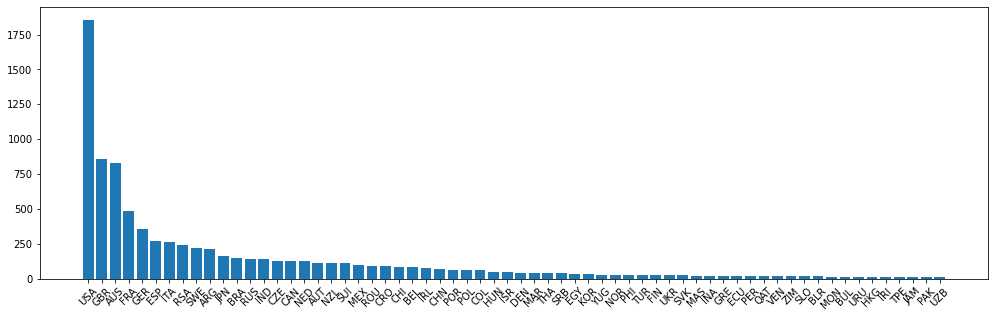

In [24]:
player_country = pd.DataFrame(player_data["flag_code"].copy())
player_country["count"] = 1
player_country = player_country.groupby("flag_code").sum().reset_index()
player_country = player_country[player_country["count"] > 10].reset_index()
player_country = player_country.sort_values("count", ascending=False).reset_index()

plt.figure(figsize=(17, 5))
plt.bar(player_country.index, player_country["count"])
plt.xticks(player_country.index, player_country["flag_code"], rotation=45)
plt.show()

Here are some observations:

1. Median of the player birthyear is 1976 but according to [site](https://khelnow.com/olympic-sports/top-five-oldest-active-tennis-players) oldest pro tennis player at 2021 is about 41 y.o. so, in dataset we can get rid from most of the players.
2. Most of the players are from USA, so it may disbalance the dataset

## Data quality

### Match Data

In [25]:
whole_match_data.isnull().sum()

atp               0
location          0
tournament        0
date              0
series            0
court             0
surface           0
round             0
best_of           0
winner            0
loser             0
wrank            21
lrank             0
w1              311
l1              308
w2              858
l2              857
w3            31258
l3            31259
w4            53094
l4            53094
w5            56473
l5            56473
wsets           271
lsets           273
comment           0
cbw           41044
cbl           41044
gbw           53489
gbl           53489
iww           45198
iwl           45198
sbw           53114
sbl           53114
b365w          8658
b365l          8636
b_ww          57438
b_wl          57438
exw           19183
exl           19178
psw           14944
psl           14944
wpts          16172
lpts          16159
ubw           47885
ubl           47885
lbw           30456
lbl           30446
sjw           42986
sjl           42979


In [26]:
whole_match_data[whole_match_data.duplicated(keep=False)]

,atp,location,tournament,date,series,court,surface,round,best_of,winner,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
63,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
377,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
560,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
611,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
613,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
301,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
360,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0
435,1890,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890,1890.0,...,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0,1890.0


In [27]:
whole_match_data[whole_match_data[cols[:11]].isna().any(axis=1)][cols[:11]]

,atp,location,tournament,date,series,court,surface,round,best_of,winner,loser


In [28]:
whole_match_data[whole_match_data[cols[11:12]].isna().any(axis=1)][cols[11:12]]

,wrank
744,NaN
2002,NaN
2020,NaN
5,NaN
17,NaN
325,NaN
335,NaN
1473,NaN
319,NaN
70,NaN


In [29]:
whole_match_data[whole_match_data[cols[12:13]].isna().any(axis=1)][cols[12:13]]

,lrank


In [30]:
whole_match_data[whole_match_data[cols[13:23]].isna().any(axis=1)][cols[13:23]]

,w1,l1,w2,l2,w3,l3,w4,l4,w5,l5
0,6.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,3.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,6.0,7.0,7.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN
3,6.0,1.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,6.0,5.0,7.0,6.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2484,2.0,6.0,7.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN
2485,6.0,2.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2486,6.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2487,7.0,6.0,4.0,6.0,6.0,3.0,NaN,NaN,NaN,NaN


In [31]:
whole_match_data[whole_match_data[cols[23:25]].isna().any(axis=1)][cols[23:25]]

,wsets,lsets
699,NaN,NaN
804,NaN,NaN
1898,NaN,NaN
2449,NaN,NaN
2650,NaN,NaN
...,...,...
1580,NaN,NaN
1830,NaN,NaN
2176,NaN,NaN
2257,NaN,NaN


In [32]:
whole_match_data[(whole_match_data[cols[23:25]].isna().any(axis=1)) & (whole_match_data["comment"] != "Completed")]["comment"]

699     Walkover
804     Walkover
1898    Walkover
2449    Walkover
2650    Walkover
          ...   
1580     Retired
1830    Walkover
2176    Walkover
2257    Walkover
2435    Walkover
Name: comment, Length: 273, dtype: object

In [33]:
whole_match_data[whole_match_data[cols[25:26]].isna().any(axis=1)][cols[25:26]]

,comment


In [34]:
whole_match_data[whole_match_data[cols[26:]].isna().all(axis=1)][cols[26:]]

,cbw,cbl,gbw,gbl,iww,iwl,sbw,sbl,b365w,b365l,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
whole_match_data[whole_match_data[cols[26:]].isna().all(axis=1)].sort_values("date")

,atp,location,tournament,date,series,court,surface,round,best_of,winner,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,22,Valencia,Open de Tenis Comunidad Valenciana,2005-04-04,International,Outdoor,Clay,1st Round,3,Labadze I.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,25,Houston,U.S. Men's Clay Court Championships,2005-04-19,International,Outdoor,Clay,1st Round,3,Goldstein P.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,25,Houston,U.S. Men's Clay Court Championships,2005-04-19,International,Outdoor,Clay,1st Round,3,Kim K.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1268,30,St. Polten,Internationaler Raiffeisen Grand Prix,2005-05-19,International,Outdoor,Clay,Quarterfinals,3,Acasuso J.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
whole_match_data[whole_match_data[["maxw", "maxl", "avgw", "avgl"]].isna().all(axis=1)][["maxw", "maxl", "avgw", "avgl"]]

,maxw,maxl,avgw,avgl
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
870,NaN,NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN
1659,NaN,NaN,NaN,NaN
2240,NaN,NaN,NaN,NaN


In [37]:
whole_match_data[whole_match_data[["maxw", "maxl", "avgw", "avgl"]].isna().all(axis=1)].sort_values("date")

,atp,location,tournament,date,series,court,surface,round,best_of,winner,...,ubw,ubl,lbw,lbl,sjw,sjl,maxw,maxl,avgw,avgl
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,23,Monte Carlo,Monte Carlo Masters,2017-04-18,Masters 1000,Outdoor,Clay,1st Round,3,Haase R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1655,41,Bastad,SkiStar Swedish Open,2017-07-18,ATP250,Outdoor,Clay,1st Round,3,Olivo R.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1659,41,Bastad,SkiStar Swedish Open,2018-07-17,ATP250,Outdoor,Clay,1st Round,3,Laaksonen H.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2240,55,Chengdu,Chengdu Open,2019-09-24,ATP250,Outdoor,Hard,1st Round,3,Harris L.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here are some observations:

1. We have no null's in atp-losee columns
2. Some of wrank and lrank has a null values, it is may be due to a first match in career
3. It is ok to have null's in w1-w5 and l1-l5 columns since most of the matches do not play all 5 games
4. There are some strage duplicates in data, possibly just error, can get rid of them
5. There is a null's in wsets and lsets values. All of the matches are from them are incomplete. Possibly can get rid of them
6. There are some matches with no bets at all. Last of them was in 2005
7. There is a lot of matches without max and average odds. Possibly it can be replased with max and average value among all odds for the match, but it will not so accurate.

### Player Data

In [38]:
cols = player_data.columns
cols

Index(['player_id', 'first_name', 'first_initial', 'last_name', 'full_name',
       'player_url', 'flag_code', 'residence', 'birthplace', 'birthdate',
       'birth_year', 'birth_month', 'birth_day', 'turned_pro', 'weight_lbs',
       'weight_kg', 'height_ft', 'height_inches', 'height_cm', 'handedness',
       'backhand', 'birth_date'],
      dtype='object')

In [39]:
player_data.isnull().sum()

player_id           0
first_name          0
first_initial      27
last_name           0
full_name           0
player_url          0
flag_code        2185
residence        8898
birthplace       7874
birthdate        5798
birth_year       5798
birth_month      5798
birth_day        5798
turned_pro       9379
weight_lbs       8206
weight_kg        8206
height_ft        8254
height_inches    8254
height_cm        8254
handedness       9776
backhand         9776
birth_date       5798
dtype: int64

In [40]:
player_data_young = player_data[player_data["birth_year"] > 1970]

In [41]:
player_data_young.shape

(2966, 22)

In [42]:
player_data_young.isnull().sum()

player_id           0
first_name          0
first_initial       0
last_name           0
full_name           0
player_url          0
flag_code           0
residence        1393
birthplace       1338
birthdate           0
birth_year          0
birth_month         0
birth_day           0
turned_pro       1869
weight_lbs       1305
weight_kg        1305
height_ft        1360
height_inches    1360
height_cm        1360
handedness       1854
backhand         1854
birth_date          0
dtype: int64

Here are some observations:

1. If to consider only 'young' (<50 y.o.) players, there is no much null values.
2. Residence and birthplace possibly can be fillen with plag code value
3. Null's in turned pro values possibly can be fillen with calculating average year for player to turned pro and adding to birthyear
4. Weight and height values can be restored with mean of this values
5. Handedness and Backhand possible can not be restored, so either to fill it with same distribution as in non-null values or do not use this value at all